<h2>Exploratory Data Analysis</h2>


<h5>Importing required libraries</h5>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h5>Taking Gist of both the datasets (uploading and exploring)</h5>

Reading the CSV files and making reading for exploratory analysis

In [4]:
client_ds = pd.read_csv('client_data (1).csv')
price_ds = pd.read_csv('price_data (1).csv')

<h5>Overview of Datasets</h5>

In [7]:
client = client_ds.head(3)
print(data_type1)

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44  

<h5>Checking column values by using info()</h5>

In [10]:
col_val_client = client_ds.info()
col_val_price = price_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


<h5>Coming to Statistics using describe()</h5>

In [16]:
client_stats = client_ds.describe()
print(client_ds)

price_stats = price_ds.describe()
print(price_ds)

                                      id  price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
...                                  ...         ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5  2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5  2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5  2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5  2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5  2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.00000

<h3>Data Visualization</h3>

In [28]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

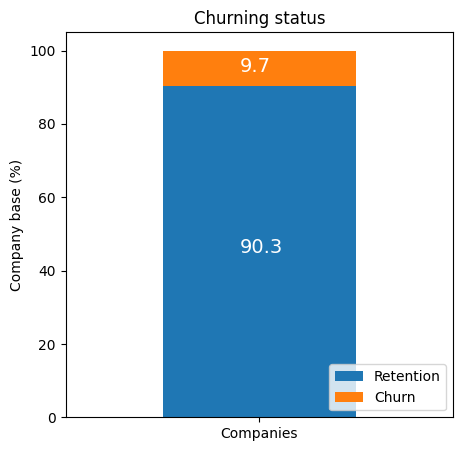

In [30]:
churn = client_ds[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")